In [1]:
!pip install pmdarima


     |████████████████████████████████| 1.5MB 6.0MB/s 
     |████████████████████████████████| 9.5MB 24.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

%matplotlib inline

In [49]:
df=pd.read_csv("household_power_consumption_mod.csv",header=0,infer_datetime_format=True,parse_dates=['datetime'],index_col=['datetime'])

In [5]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5 MB


In [51]:
hourly_data=df.resample('H').sum()


In [52]:
print(hourly_data.shape)
print(hourly_data.head())
# save
hourly_data.to_csv('household_power_consumption_hrs.csv')

(34589, 8)
                     Global_active_power  ...  Sub_metering_4
datetime                                  ...                
2006-12-16 17:00:00              152.024  ...     1907.733335
2006-12-16 18:00:00              217.932  ...     2217.199990
2006-12-16 19:00:00              204.014  ...     2313.233326
2006-12-16 20:00:00              196.114  ...     2261.566665
2006-12-16 21:00:00              183.388  ...     1998.466660

[5 rows x 8 columns]


In [53]:
daily_data=df.resample('D').sum()


In [54]:
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  ...  Sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...    14680.933319
2006-12-17             3390.460  ...    36946.666732
2006-12-18             2203.826  ...    19028.433281
2006-12-19             1666.194  ...    13131.900043
2006-12-20             2225.748  ...    20384.800011

[5 rows x 8 columns]


In [ ]:
#hourly_data.head()

In [55]:
daily_data.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,1567.839069,178.004759,346600.529542,6646.587101,1609.656033,1858.135229,9280.574202,13382.285696
std,597.306856,48.881691,7375.850040,2472.108924,1581.726035,2085.161400,3674.915577,6071.784572
min,250.298000,34.922000,93552.530000,1164.000000,0.000000,0.000000,1288.000000,2313.633346
25%,1176.195000,143.063000,345736.802500,5055.400000,700.000000,432.500000,6681.000000,9400.766697
50%,1543.253000,171.199000,346979.430000,6539.300000,1119.000000,696.000000,9272.000000,12634.700023
75%,1894.467500,202.548500,348283.367500,7965.600000,2201.750000,2732.000000,11764.000000,16498.225003
max,4773.386000,417.834000,356306.410000,20200.400000,11178.000000,12109.000000,23743.000000,61736.433386


In [56]:
daily_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1442 non-null   float64
 1   Global_reactive_power  1442 non-null   float64
 2   Voltage                1442 non-null   float64
 3   Global_intensity       1442 non-null   float64
 4   Sub_metering_1         1442 non-null   float64
 5   Sub_metering_2         1442 non-null   float64
 6   Sub_metering_3         1442 non-null   float64
 7   Sub_metering_4         1442 non-null   float64
dtypes: float64(8)
memory usage: 101.4 KB


**visualization**

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

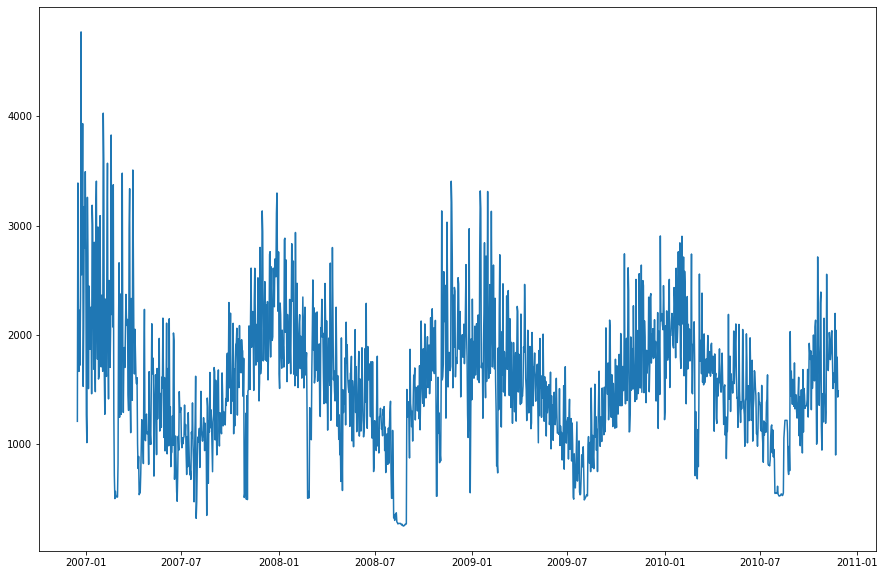

In [58]:
plt.figure(figsize=(15,10))
plt.plot(daily_data['Global_active_power'])

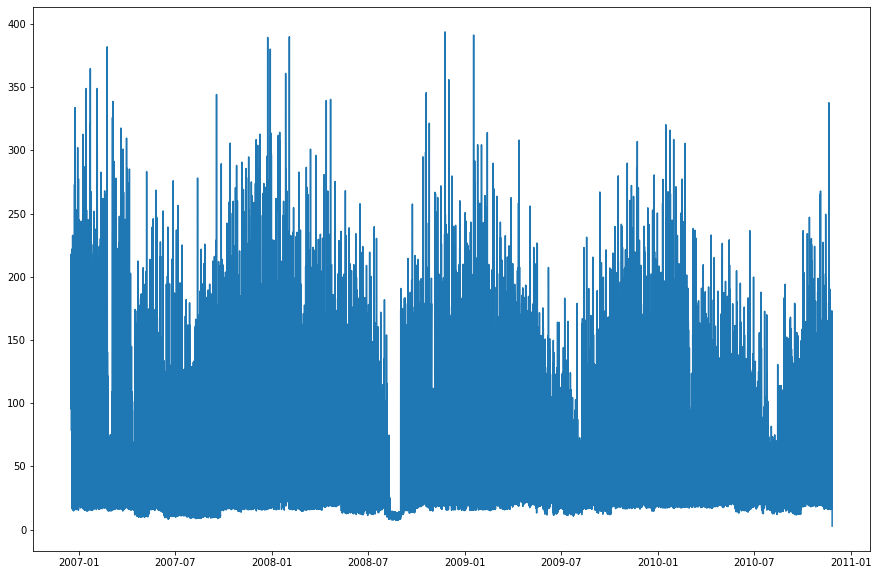

In [59]:
plt.figure(figsize=(15,10))
plt.plot(hourly_data['Global_active_power'])

In [60]:
daily_data['power']=daily_data['Global_active_power']

In [61]:
daily_data=daily_data.drop(['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Sub_metering_4'],axis=1)

In [62]:
daily_data.head()

,power
datetime,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


In [63]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   1442 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB


In [64]:
daily_data_mod=daily_data[:100]

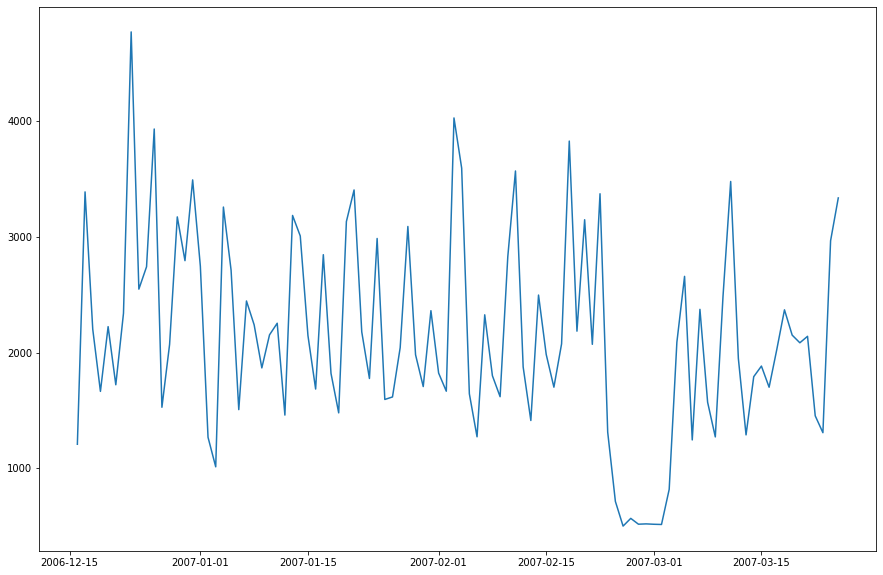

In [65]:
plt.figure(figsize=(15,10))
plt.plot(daily_data_mod['power'])

In [66]:
hourly_data['power']=hourly_data['Global_active_power']

In [67]:
hourly_data=hourly_data.drop(['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Sub_metering_4'],axis=1)

In [68]:
hourly_data.head()

,power
datetime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388


In [69]:
hourly_data_mod=hourly_data[:240]

In [70]:
hourly_data_mod

,power
datetime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388
...,...
2006-12-26 12:00:00,147.882
2006-12-26 13:00:00,173.208
2006-12-26 14:00:00,229.596


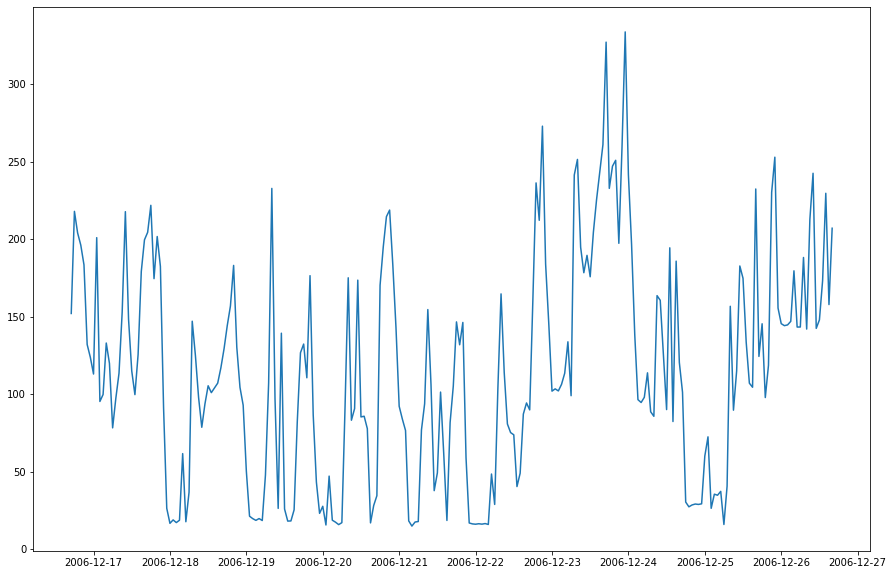

In [71]:
plt.figure(figsize=(15,10))
plt.plot(hourly_data_mod['power'])

**stationarity test**

In [72]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(hourly_data_mod['power'])

In [73]:
#H1: It is stationary

def adfuller_test(consumption):
    result=adfuller(consumption)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [74]:
adfuller_test(hourly_data_mod['power'])


ADF Test Statistic : -5.533649326018711
p-value : 1.764524073274018e-06
#Lags Used : 0
Number of Observations Used : 239
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#daily_data['power First Difference'] = daily_data['power'] - daily_data['power'].shift(1)


In [75]:
import warnings
warnings.filterwarnings('ignore')

**arima**

In [76]:
stepwise_fit=auto_arima(hourly_data_mod['power'].dropna(),trace=True,supress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2540.409, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2537.240, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2535.321, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2538.414, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2531.739, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2531.689, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2526.177, Time=0.36 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2522.420, Time=0.53 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=2520.445, Time=0.25 s

In [77]:
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1248.564
Date:                Fri, 30 Apr 2021   AIC                           2511.129
Time:                        20:27:01   BIC                           2535.464
Sample:                             0   HQIC                          2520.935
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7309      0.011    161.412      0.000       1.710       1.752
ar.L2         -0.9909      0.011    -93.990      0.000      -1.012      -0.970
ma.L1         -2.0137      0.062    -32.737      0.000      -2.134      -1.893
ma.L2          1.2718      0.137      9.268      0.000       1.003       1.541
ma.L3          0.0660      0.140      0.472      0.637      -0.208       0.340
ma.L4         -0.2066      0.067     -3.091      0.002      -0.338      -0.076
sigma2      2018.7786    185.631     10.875      0.000    1654.949    2382.608
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.67
Prob(Q):                              0.97   Prob(JB):                         0.01
Heteroskedasticity (H):               1.36   Skew:                             0.45
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
from statsmodels.tsa.arima_model import ARIMA


In [79]:
240*.7


168.0

In [80]:
train=hourly_data_mod.iloc[:168]
test=hourly_data_mod.iloc[168:]
print(train.shape,test.shape)

(168, 1) (72, 1)


In [81]:
model=ARIMA(train['power'].dropna(),order=(2,1,4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.power   No. Observations:                  167
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -858.873
Method:                       css-mle   S.D. of innovations             40.821
Date:                Fri, 30 Apr 2021   AIC                           1733.746
Time:                        20:27:16   BIC                           1758.690
Sample:                    12-16-2006   HQIC                          1743.870
                         - 12-23-2006                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6143      1.446      0.425      0.671      -2.220       3.449
ar.L1.D.power     1.7320        nan        nan        nan         nan         nan
ar.L2.D.power    -0.9994        nan        nan        nan         nan         nan
ma.L1.D.power    -1.9540      0.042    -46.966      0.000      -2.036      -1.872
ma.L2.D.power     1.0814      0.148      7.291      0.000       0.791       1.372
ma.L3.D.power     0.3055      0.187      1.632      0.103      -0.061       0.672
ma.L4.D.power    -0.3116      0.092     -3.374      0.001      -0.493      -0.131
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8665           -0.4998j            1.0003           -0.0833
AR.2            0.8665           +0.4998j            1.0003            0.0833
MA.1           -2.1981           -0.0000j            2.1981           -0.5000
MA.2            0.8684           -0.5083j            1.0063           -0.0843
MA.3            0.8684           +0.5083j            1.0063            0.0843
MA.4            1.4417           -0.0000j            1.4417           -0.0000
-----------------------------------------------------------------------------
"""

In [82]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2006-12-23 17:00:00    261.706666
2006-12-23 18:00:00    276.134694
2006-12-23 19:00:00    295.672622
2006-12-23 20:00:00    305.939885
2006-12-23 21:00:00    304.360559
                          ...    
2006-12-26 12:00:00    286.820921
2006-12-26 13:00:00    268.484677
2006-12-26 14:00:00    259.011660
2006-12-26 15:00:00    261.094162
2006-12-26 16:00:00    274.332775
Freq: H, Length: 72, dtype: float64


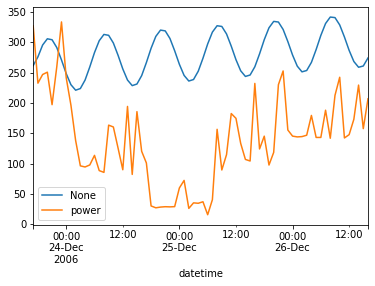

In [83]:
pred.plot(legend=True)
test['power'].plot(legend=True)

In [84]:
test['power'].mean()


139.33761111111116

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['power']))
print(rmse)

163.0539062181409


In [88]:
model2=ARIMA(hourly_data_mod['power'],order=(2,1,4))
model2=model2.fit()
hourly_data_mod.tail()

,power
datetime,
2006-12-26 12:00:00,147.882
2006-12-26 13:00:00,173.208
2006-12-26 14:00:00,229.596
2006-12-26 15:00:00,157.776
2006-12-26 16:00:00,207.044


In [89]:
len(hourly_data_mod)

240

In [92]:
index_future_dates=pd.date_range(start='2006-12-26 17:00:00',end='2006-12-27 16:00:00	')
forcast=model2.predict(start=len(hourly_data_mod),end=len(hourly_data_mod)+24,typ='levels').rename('arima preds')
#forcast.index=index_future_dates
print(forcast)

2006-12-26 17:00:00    198.259078
2006-12-26 18:00:00    178.369779
2006-12-26 19:00:00    172.850990
2006-12-26 20:00:00    164.332367
2006-12-26 21:00:00    157.283783
2006-12-26 22:00:00    152.189203
2006-12-26 23:00:00    148.684209
2006-12-27 00:00:00    146.332355
2006-12-27 01:00:00    144.785256
2006-12-27 02:00:00    143.791691
2006-12-27 03:00:00    143.176723
2006-12-27 04:00:00    142.820129
2006-12-27 05:00:00    142.639706
2006-12-27 06:00:00    142.579362
2006-12-27 07:00:00    142.600854
2006-12-27 08:00:00    142.678116
2006-12-27 09:00:00    142.793382
2006-12-27 10:00:00    142.934546
2006-12-27 11:00:00    143.093359
2006-12-27 12:00:00    143.264199
2006-12-27 13:00:00    143.443234
2006-12-27 14:00:00    143.627854
2006-12-27 15:00:00    143.816280
2006-12-27 16:00:00    144.007300
2006-12-27 17:00:00    144.200086
Freq: H, Name: arima preds, dtype: float64


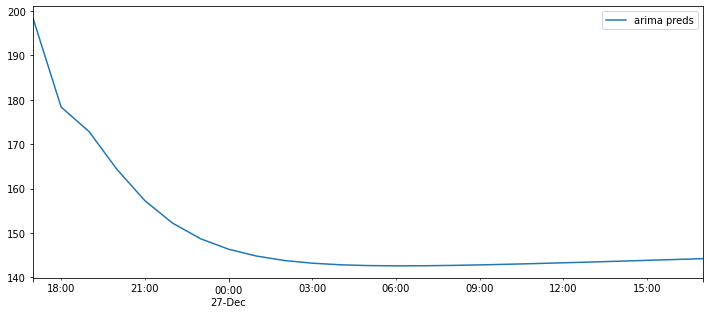

In [93]:
forcast.plot(figsize=(12,5),legend=True)
